# The Task
### Determine the EC50 and hill coefficient for a drug (Ligand A) acting on a spiking cell

<img src="Example.png">

### Important information
- The drug has been applied 5 times at each concentration and the data has been saved in .csv files, one for each concentration
- The data was sampled at 50 kHz
- The drug was applied for 1 second in each trial
- Unexpected noise occurred during the recordings
- Quantify the average number of spikes at each conencentration
- Then fit a Hill curve to this data


In [1]:
#Load the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.optimize as fit
import glob    
#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 14, 'figure.figsize': [12, 8]})
# sets some default parameters for the size and font size of all plots
# You do not need to understand this line, other than it 


### Get a list of the file names that we will process

- use glob.glob( ) to create a **list** called "files" that contains the name of each file in the "Data sets" folder
- print some text to inform us how many concentrations were tested
- print the contents of the list to make sure it is ordered correctly
- you learnt how to do this in PreWork3

The file names in **"files"** are not in acscending order of concentration. We want them to be ordered in ascending concentration as this will make later analysis much easier. 

So we will modify the code so that the file names are **sorted**
- copy and paste your code form above in the cell below
- modify it so that glob.glob( ) is inside sorted( ), i.e. <code>files=sorted(glob.glob('____'))</code>


### You now have an ordered list of file names that we are going to process
--------
# Next load one of the files and inspect it

- make data = **np.loadtxt( )** and load the **last** file in the list, i.e. the strongest concentration
- do this using files[ ] with the appropriate index
- print the **shape** of the data, i.e. how many rows and columns
- you learnt how to do this in PreWork1 & 2

- now make an xScale array to plot the data with the correct x scaling, use np.arange()
- recall that np.arange( ) wants startTime,endTime,interval
- you need the sample rate for this which is in the important information above
- you learnt how to do this in PreWork2

- and plot the first column in a new figure and inspect it

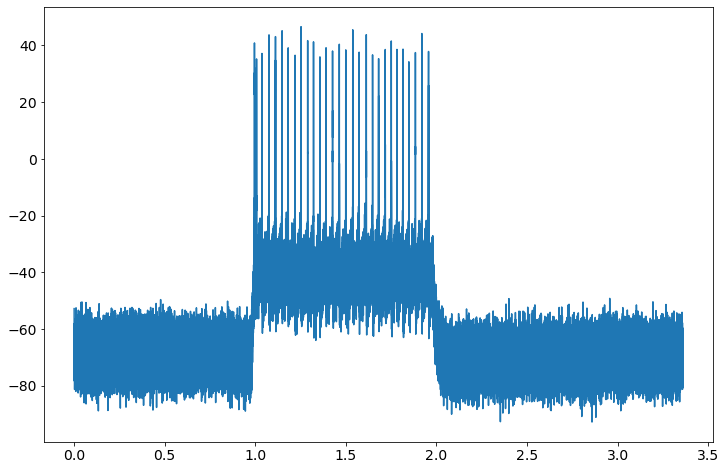

We want to be able to explore this trace in more detail by zooming in on the action potentials. To do this we will change how matplotlib works, instead of embedding the graphs in the notebook we will make them interactive.
The magic command <code>%matplotlib widget</code> does this. 
- run the cell below to change how this notebook uses matplotlib

In [7]:
%matplotlib widget

When using this interactive 'widget' method you first have to create a figure every time you plot something using <code>plt.figure()</code>

in the cell below try:  
<code>plt.figure()
plt.plot(xScale,data[:,0]);</code>


Then play about with the graph's controls
- the empty square allows you to draw a box on the graph that will zoom in
- the crossed arrows allow you to drag the plot around, useful when you have zoomed in
- the home button resets the axis
- you can also resize the graph by dragging the botton right corner

#### you should find that the spikes are pretty noisey... some of the noise fluctuates around 0 which may prevent find_peaks from working well
we will fix this by filtering the data with a simple median filter (https://en.wikipedia.org/wiki/Median_filter)

- add another line to the code above to plot a filtered version ontop of the last graph
- Hint: scipy.signal has medfilt (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html)
- we are referring to scipy.siganl as signal, so you just need to type signal.medfilt(....
- zoom in again on the filtered signal
- change the window size (aka kernel_size) so that the spikes rise and fall without lots of noise but still cross zero
---------------------

For your information: *This method of using matplotlib is clearly great for exploring data, the disadvantage is that the graphs are not embedded in the notebook. i.e. when you save as html the graphs will be missing.  
If you want to change back to the 'embedded' behaviour run <code>%matplotlib inline</code> in a cell. You may also want to change the size of the graphs back to what we were using before. You can rerun the first code cell, it contains the line plt.rcParams..... which sets these parameters*

Once you have determined an appropriate filter window your graph should look something like this:
<img src="FilteredExample.png">

### Now we will detect how many spikes were in this trial. You can reuse the appropriate code from your pre-work book to do this.. use the filtered data to do this

- you may want to refer to your completed PreWork2 notebook
- remember that find_peaks has 2 outputs
- instead of inputting the data to find_peaks, use the code from above i.e. signal.medfilt(data[.....
- print the number of spikes in this trial

### Now loop through each trial doing the same thing
- create a **for** loop with i in range(data.shape[1]) to get the number of columns, refer to PreWork1 if needed
- paste you code from the above cell inside the for loop
- make sure to change the column index to 'i' in data
- make sure the print statement is also inside the loop

### Instead of printing the values we want to put them in an array so it is easy to calculate the mean

- so first create an array to hold these values, call it "spikes", you can use np.zeros( ) to generate an empty array
- then run the loop again but instead of printing, put the number of spikes into the index of spikes, i.e. <code>spikes[i]=len(peaks)</code>

- after the loop (i.e. not indented) print the mean number of spikes for this trial and the standard deviation. use <code>np.mean()</code> and <code>np.std()</code>

### We are now ready to do this for all the files

- first create 2 lists meanSpikes and SD, to store the mean and SD from each file respectively
- then create a for loop to loop file in files:
- inside this use np.loadtxt to load each file
- then paste the code you developed in the above cell inside this loop
- instead of print the mean and SD append them to their list, see PreWork1 for how to append to a list
- take care with your indentation!


#### Great! you have just looped through all the data, filtered it, detected spikes and calculated the mean and SD for each trial!

You just need to plot these, first you need an array corresponding to concentrations
- the code below creates this for you

In [8]:
concentration=np.array([0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3])

- make a new figure. i.e. <code>plt.figure()</code>
- use the following to plot your results:

<code>plt.errorbar(concentration,meanSpikes,yerr=SD,fmt='o');</code>

see details here (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html)
- change x axis to log scale: <code>plt.xscale('log')</code>
- label the x and y axes, see PreWork2

## Now we will fit the the Hill equation to this data
<img src="HillEquation.png">

### To fit an equation to data we first need to "define" the equation as a python function 


In [ ]:
# remember a function receives inputs, in this case the parameters of the equation, i.e. EC50, n, etc
# importantly the the first input needs to be the dependent variable, in this case the concentration

def hillFunction(conc,Max,EC50,n):
    return Max/(1+(EC50/conc)**n)


### Now we want to fit this equation to our data to determine what the best value is for each of the parameters: EC50, n and max. We can use SciPy's optimize module which we have called "fit"
- follow the instruction in the below cell
- and then print the EC50 and the Hill coefficent
- check PreWork4 for a similar example if you get stuck

Details of the curvefit function can be found here: (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [ ]:
# use fit.curve_fit to obtain the best parameters, we input the function we want to fit and the x and y data
# curve fit outputs 2 objects, the parameters which we want and the covariance which you can ignore.

params, paramsCoV = fit.curve_fit(hillFunction,concentration,meanSpikes)

# insert code to print the EC50 and hill coefficent "n"


### Finally we will plot our results with the fit we have just obtained
- first copy and paste the code for your previous plot of the mean and SD that you generated in a previous cell
- now generate a new concentration array with many more points, this will make our fit display as a smooth curve, call it "manyConcs", you can use np.arange( ), the start and end should be the lowest and highest concentration respectively, use 0.00001 for the interval
- then use plt.plot to add the curve to the graph.. for the y data you simply use the hill function with the appropriate index of "params". See PreWork4 for a similar example
- to finish off also print what the EC50 and Hill coefficent are